In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

from matplotlib import pyplot as plt


In [2]:
df=pd.read_csv('data/listings.csv.gz')

## Df Shape

In [3]:
print('Df Dimensions:',df.shape)

Df Dimensions: (66641, 74)


In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

## Missing values

In [5]:
missing_df=pd.DataFrame(df.isnull().sum(),columns=['missing rows'])
criteria=(missing_df['missing rows']!=0)
missing_df=missing_df[criteria].reset_index()

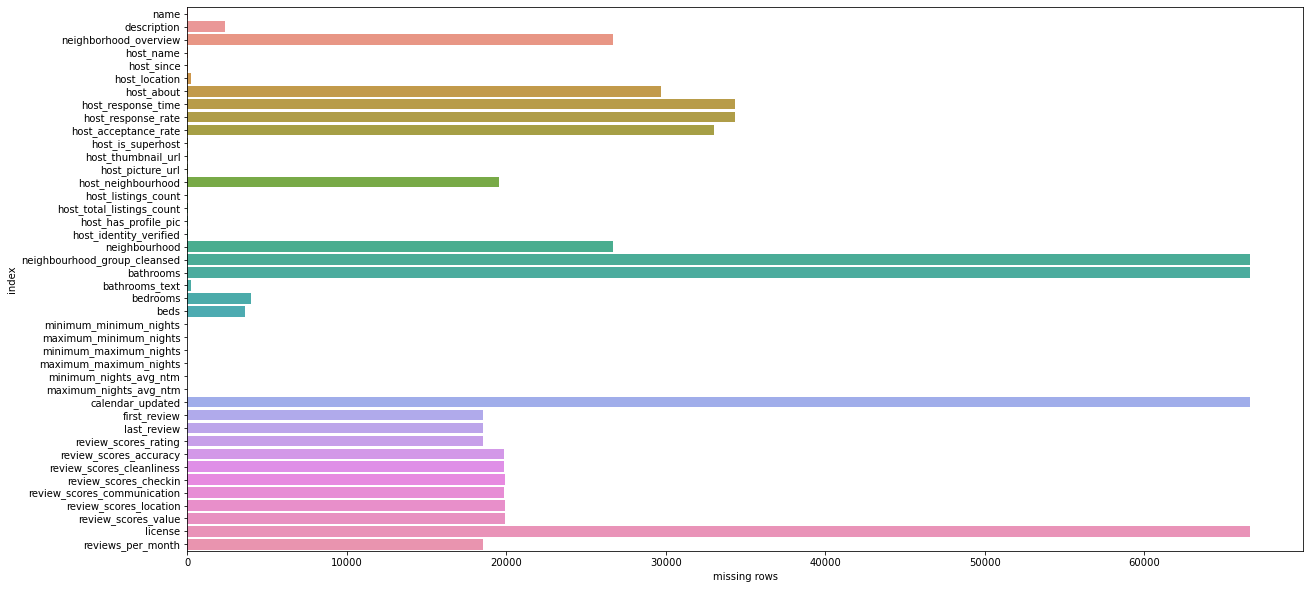

In [6]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="missing rows", y="index",data=missing_df)

In [7]:
print('Rows with at least 1 missing column val:',df.isnull().any(axis = 1).sum())

Rows with at least 1 missing column val: 66641


In [8]:
missing_df

,index,missing rows
0,name,24
1,description,2344
2,neighborhood_overview,26674
3,host_name,59
4,host_since,59
5,host_location,201
6,host_about,29692
7,host_response_time,34334
8,host_response_rate,34334
9,host_acceptance_rate,32993


## Properties per host

In [9]:
listings=pd.DataFrame(df.groupby(['host_id'])['host_id'].count())
listings.columns=['listings']
listings.describe()

,listings
count,44695.000000
mean,1.491017
std,5.949452
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,845.000000


In [10]:
percentiles=[0.80,0.85,0.90,0.95]
prop=[]

for p in percentiles:
   prop.append(df.host_id.value_counts().quantile(p))
print(pd.DataFrame({'percentile':percentiles,'listings':prop}))

   percentile  listings
0        0.80       1.0
1        0.85       2.0
2        0.90       2.0
3        0.95       3.0


In [11]:
listings['ctr']=''
listings['ctr']=listings['listings'].apply(lambda x: '>=3' if x>=3 else x)
listings=pd.DataFrame(listings.ctr.value_counts())
listings=listings.reset_index()
listings.columns=['host with n properties','count']

In [12]:
listings

,host with n properties,count
0,1,37505
1,2,4454
2,>=3,2736


Text(0.5, 1.0, 'Countplot of Host w/ n properties')

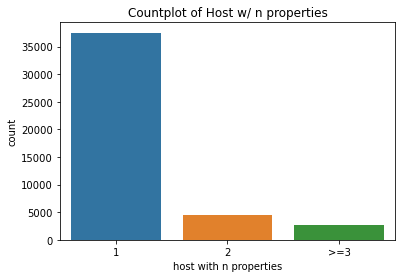

In [13]:
ax = sns.barplot(x="host with n properties", y="count", data=listings)
plt.title('Countplot of Host w/ n properties')

## Columns with Extreme Outliers

In [15]:
num_cols = list(df.select_dtypes(include=np.number).columns)
drop_cols= ['id','scrape_id','host_id','license']
cols=[]

for i in num_cols:
    if i not in drop_cols:
        cols.append(i)
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
host_listings_count,66582.0,64.943213,3.765785e+02,0.000000,1.00000,1.00000,3.00000,3.750000e+03
host_total_listings_count,66582.0,64.943213,3.765785e+02,0.000000,1.00000,1.00000,3.00000,3.750000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,66641.0,51.509631,4.833392e-02,51.295937,51.48287,51.51383,51.53996,5.167983e+01
longitude,66641.0,-0.127954,9.731470e-02,-0.496160,-0.18867,-0.12493,-0.06896,2.885700e-01
accommodates,66641.0,3.004937,1.927051e+00,0.000000,2.00000,2.00000,4.00000,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,62624.0,1.489253,8.839426e-01,1.000000,1.00000,1.00000,2.00000,2.200000e+01
beds,62995.0,1.757981,1.262523e+00,1.000000,1.00000,1.00000,2.00000,3.800000e+01
minimum_nights,66641.0,6.654852,3.039370e+01,1.000000,1.00000,2.00000,4.00000,1.125000e+03


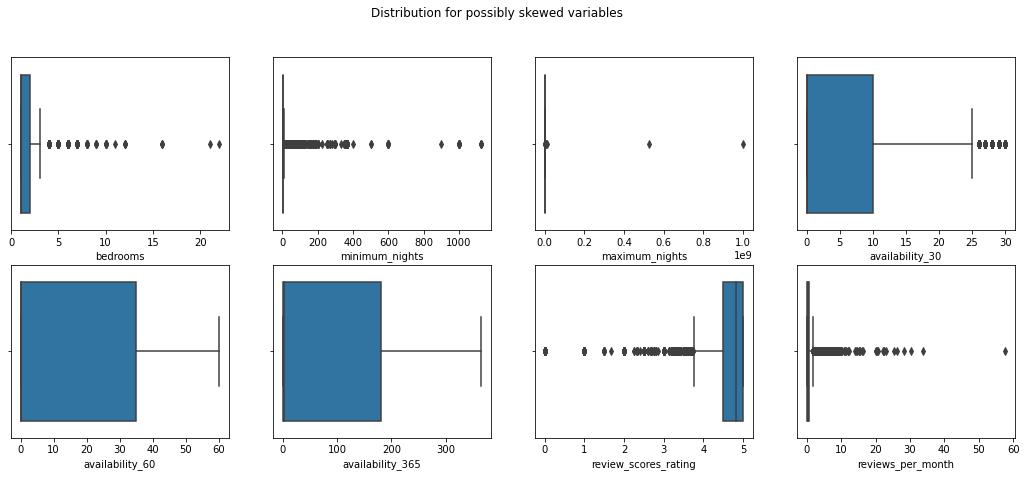

In [16]:
cols=['bedrooms','minimum_nights','maximum_nights','availability_30','availability_60','availability_365',
     'review_scores_rating','reviews_per_month']

nums=df[cols]
fig, ax = plt.subplots(2,4,figsize=(18,7))
col = 0
for axes in ax.flat:
    sns.boxplot(x=nums[cols[col]], ax=axes)
    col +=1
plt.suptitle('Distribution for possibly skewed variables')
plt.show()


## Inactive Listings


In [17]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [18]:
from dateutil import parser
host_age=list(df.host_since)
host_age = [i for i in host_age if str(i) != 'nan']


host_age = [parser.parse(str(i)).date() for i in host_age ]
print('Earliest listing date:',min(host_age))
print('Latest listing date:',max(host_age))


Earliest listing date: 2008-08-14
Latest listing date: 2021-12-06


<ipython-input-19-eeacc315290e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['old_new']='old'
<ipython-input-19-eeacc315290e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['old_new']='new'


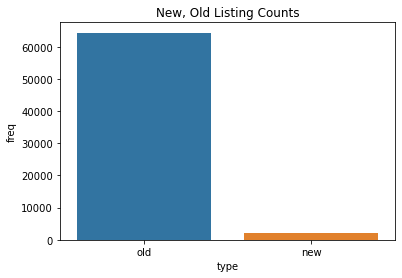

  type   freq
0  old  64338
1  new   2244


In [19]:
criteria1=(df.host_since<='2020-12-05')
criteria2=(df.host_since>'2020-12-05')
df_exp=df[criteria1]
df_exp['old_new']='old'
df_new=df[criteria2]
df_new['old_new']='new'

df_combined=pd.concat([df_new,df_exp])
counts=pd.DataFrame(df_combined['old_new'].value_counts()).reset_index()
counts.columns=['type','freq']
sns.barplot(x='type',y='freq',data=counts)
plt.title('New, Old Listing Counts')
plt.show()
print(counts)

In [20]:
df_exp['reviews_per_month'].describe()

count    46719.000000
mean         0.604881
std          0.933300
min          0.010000
25%          0.080000
50%          0.280000
75%          0.750000
max         28.400000
Name: reviews_per_month, dtype: float64